
# Descripció del Dataset: Online Shopping Dataset

CustomerID (numèrica): Identificador únic de cada client.

Gender (categòrica): Gènere del client (per exemple, Male, Female).

Location (text): Localització del client.

Tenure_Months (numèrica): Nombre de mesos que el client porta registrat a la plataforma.

Transaction_ID (numèrica): Identificador únic de cada transacció.

Transaction_Date (data): Data en què es va fer la transacció.

Product_SKU (text): Codi SKU (Stock Keeping Unit) del producte.

Product_Description (text): Descripció textual del producte.

Product_Category (categòrica): Categoria a la qual pertany el producte.

Quantity (numèrica): Quantitat del producte comprat en la transacció.

Avg_Price (numèrica): Preu mitjà del producte.

Delivery_Charges (numèrica): Despeses associades a l’enviament del producte.

Coupon_Status (categòrica): Estat del cupó aplicat a la transacció (si n’hi ha).

GST (numèrica): Impost sobre béns i serveis associat a la transacció.

Date (data): Data de la transacció (potser redundant amb Transaction_Date).

Offline_Spend (numèrica): Quantitat de diners gastats pel client en compres fora de línia.

Online_Spend (numèrica): Quantitat de diners gastats pel client en compres en línia.

Month (categòrica): Mes de la transacció (potser extret de la data).

Coupon_Code (text): Codi del cupó utilitzat, si n’hi ha.

Discount_pct (numèrica): Percentatge de descompte aplicat a la transacció.

In [1]:
import pandas as pd

# Carreguem el CSV
df = pd.read_csv('data/file.csv')

# Mirem les primeres files
print(df.head())

   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3 

In [2]:
# Mirem informació general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [3]:
# Mirem estadístiques bàsiques (si hi ha columnes numèriques)
print(df.describe())

         Unnamed: 0   CustomerID  Tenure_Months  Transaction_ID      Quantity  \
count  52955.000000  52924.00000   52924.000000    52924.000000  52924.000000   
mean   26477.000000  15346.70981      26.127995    32409.825675      4.497638   
std    15286.936089   1766.55602      13.478285     8648.668977     20.104711   
min        0.000000  12346.00000       2.000000    16679.000000      1.000000   
25%    13238.500000  13869.00000      15.000000    25384.000000      1.000000   
50%    26477.000000  15311.00000      27.000000    32625.500000      1.000000   
75%    39715.500000  16996.25000      37.000000    39126.250000      2.000000   
max    52954.000000  18283.00000      50.000000    48497.000000    900.000000   

          Avg_Price  Delivery_Charges           GST  Offline_Spend  \
count  52924.000000      52924.000000  52924.000000   52924.000000   
mean      52.237646         10.517630      0.137462    2830.914141   
std       64.006882         19.475613      0.045825     936.

In [4]:
print(f"Files restants abans de neteja: {df.shape[0]}")

# Mostrem la quantitat de valors nuls per columna
print(f"Valors nuls a cada columna:")
df.isnull().sum().sort_values(ascending=False)

Files restants abans de neteja: 52955
Valors nuls a cada columna:


Discount_pct           400
Coupon_Code            400
CustomerID              31
Online_Spend            31
Offline_Spend           31
Date                    31
GST                     31
Coupon_Status           31
Delivery_Charges        31
Avg_Price               31
Quantity                31
Product_Description     31
Product_SKU             31
Transaction_Date        31
Transaction_ID          31
Tenure_Months           31
Location                31
Gender                  31
Product_Category         0
Month                    0
Unnamed: 0               0
dtype: int64

In [5]:
# Apliquem un llindar mínim de valors no nuls per fila
threshold = df.shape[1] // 2
df_clean = df.dropna(thresh=threshold).copy()

# Omplim valors nuls on té sentit mantenir la fila
df_clean['Coupon_Code'] = df_clean['Coupon_Code'].fillna('None')
df_clean['Discount_pct'] = df_clean['Discount_pct'].fillna(0)

In [6]:
print(f"Files restants després de neteja: {df_clean.shape[0]}")

# Mostrem la quantitat de valors nuls per columna
print(f"Valors nuls a cada columna:")
df_clean.isnull().sum().sort_values(ascending=False)

Files restants després de neteja: 52924
Valors nuls a cada columna:


Unnamed: 0             0
Avg_Price              0
Coupon_Code            0
Month                  0
Online_Spend           0
Offline_Spend          0
Date                   0
GST                    0
Coupon_Status          0
Delivery_Charges       0
Quantity               0
CustomerID             0
Product_Category       0
Product_Description    0
Product_SKU            0
Transaction_Date       0
Transaction_ID         0
Tenure_Months          0
Location               0
Gender                 0
Discount_pct           0
dtype: int64

In [7]:
# Comprovem quantes files duplicades hi ha
duplicats = df_clean.duplicated().sum()
print(f"Nombre de files duplicades: {duplicats}")


Nombre de files duplicades: 0


In [8]:
# Ens assegurem que 'Transaction_Date' és del tipus datetime
df_clean['Transaction_Date'] = pd.to_datetime(df_clean['Transaction_Date'], errors='coerce')

# Comprovem que la conversió ha estat correcta
print(df_clean['Transaction_Date'].dtypes)

# Extraiem components útils per a l'anàlisi temporal
df_clean['Year'] = df_clean['Transaction_Date'].dt.year
df_clean['Month'] = df_clean['Transaction_Date'].dt.month
df_clean['Day'] = df_clean['Transaction_Date'].dt.day
df_clean['Weekday'] = df_clean['Transaction_Date'].dt.day_name()


datetime64[ns]


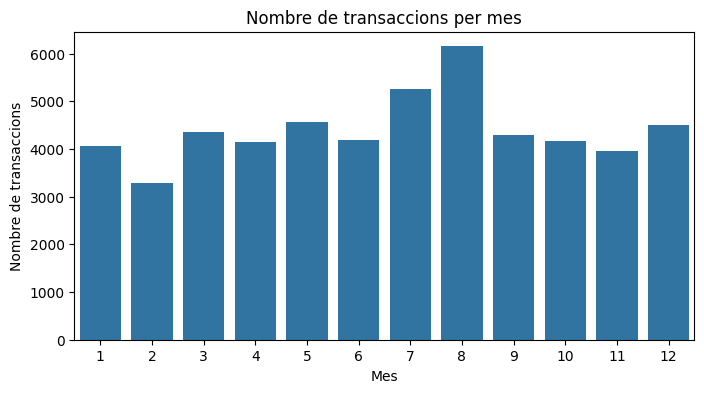

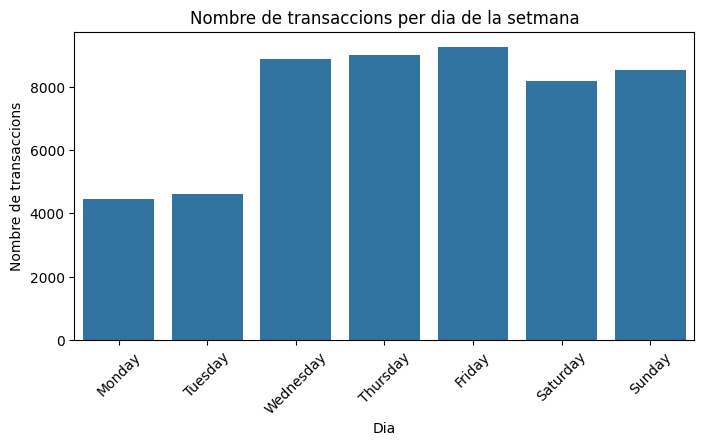

In [9]:
#Comprovem que hem fet correctament l'extracció de les dades temporals del datetime

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x='Month')
plt.title("Nombre de transaccions per mes")
plt.xlabel("Mes")
plt.ylabel("Nombre de transaccions")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Nombre de transaccions per dia de la setmana")
plt.xlabel("Dia")
plt.ylabel("Nombre de transaccions")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Llistem les columnes categòriques que volem convertir
categorical_cols = ['Gender', 'Coupon_Status', 'Location', 'Discount_pct']

# Convertim cada una d'elles a tipus category
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

# Comprovem el tipus de dades després de la conversió
print(df_clean.dtypes[categorical_cols])


Gender           category
Coupon_Status    category
Location         category
Discount_pct     category
dtype: object


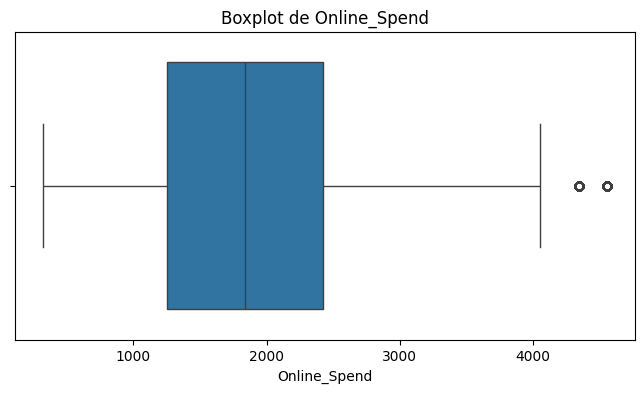

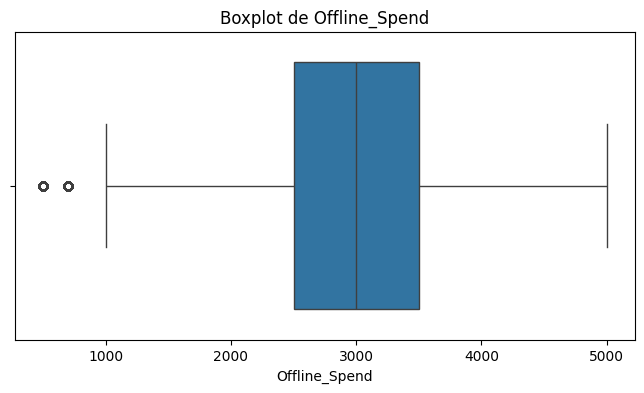

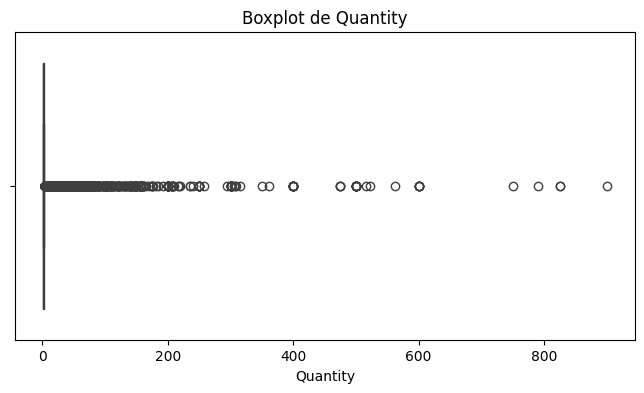

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Online_Spend', 'Offline_Spend', 'Quantity']

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_clean, x=var)
    plt.title(f"Boxplot de {var}")
    plt.show()


<Figure size 1400x600 with 0 Axes>

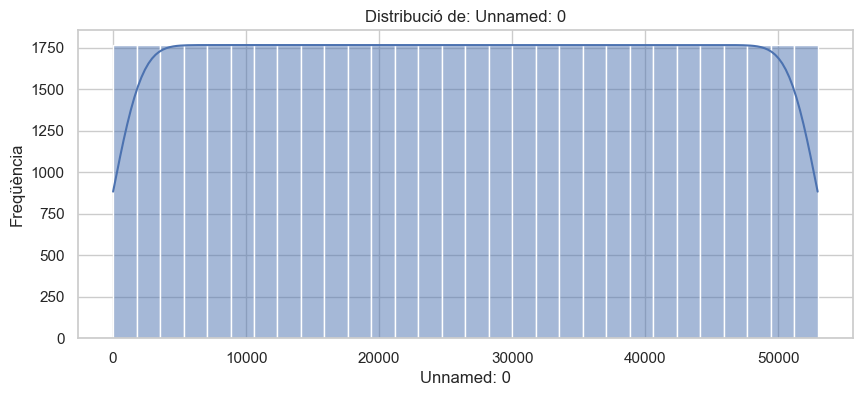

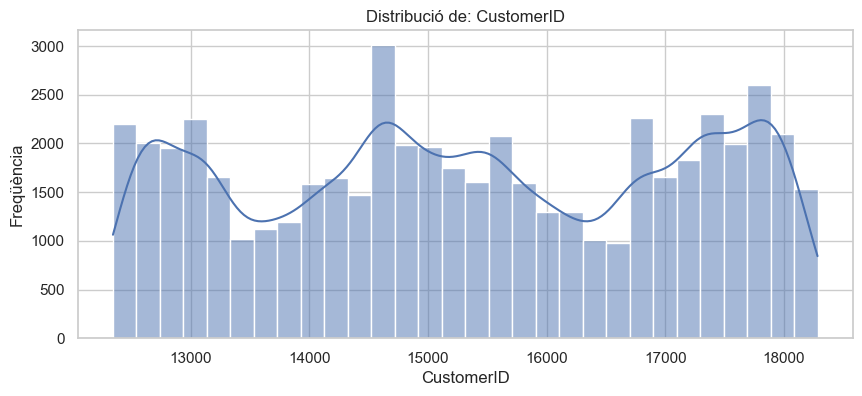

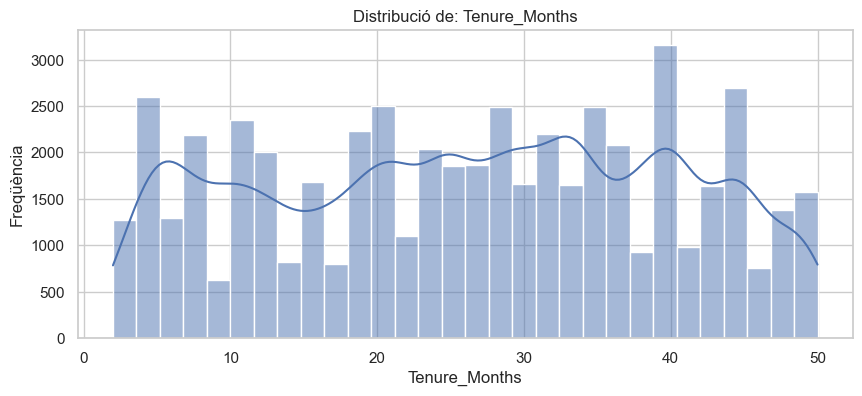

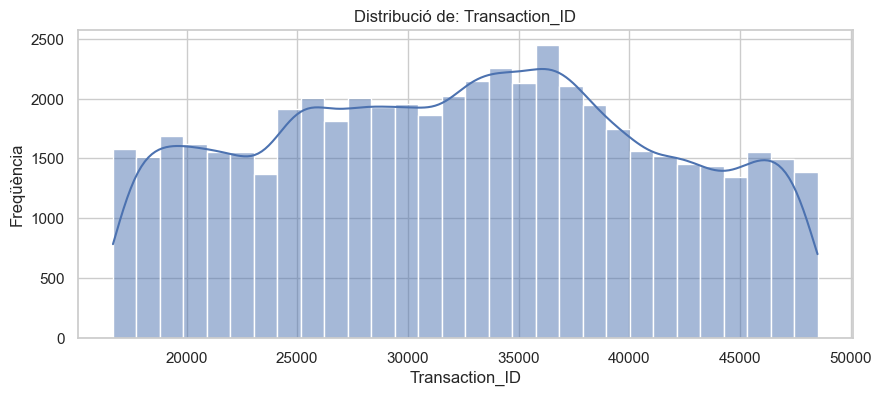

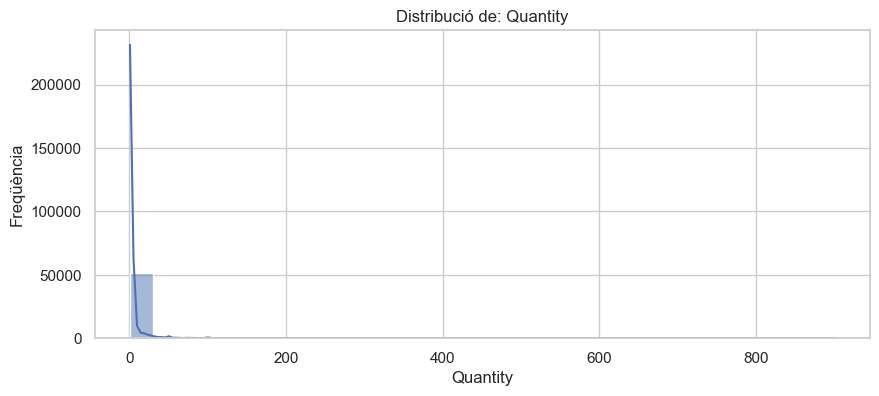

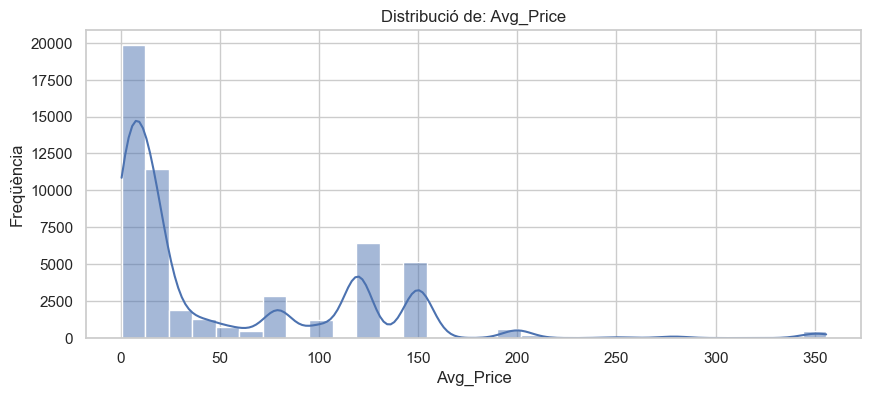

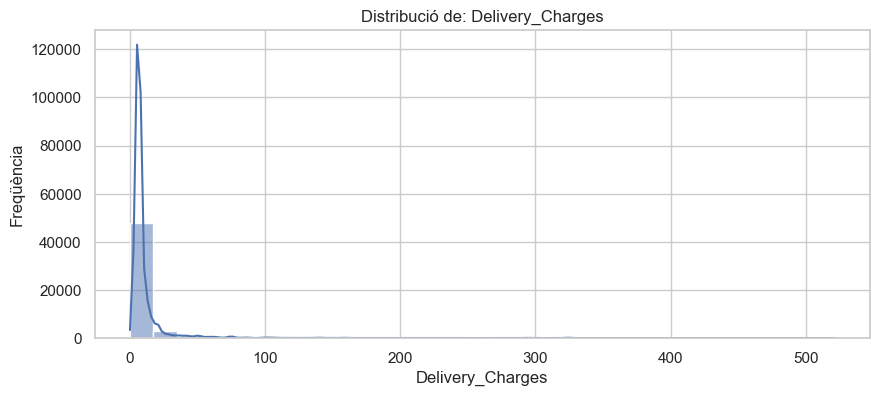

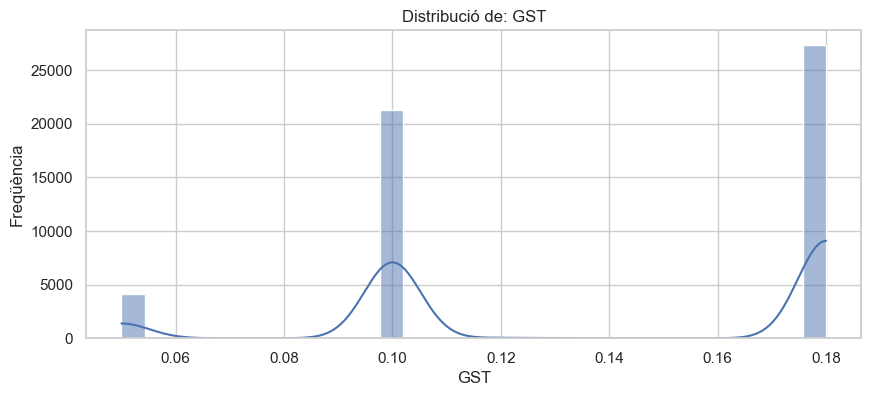

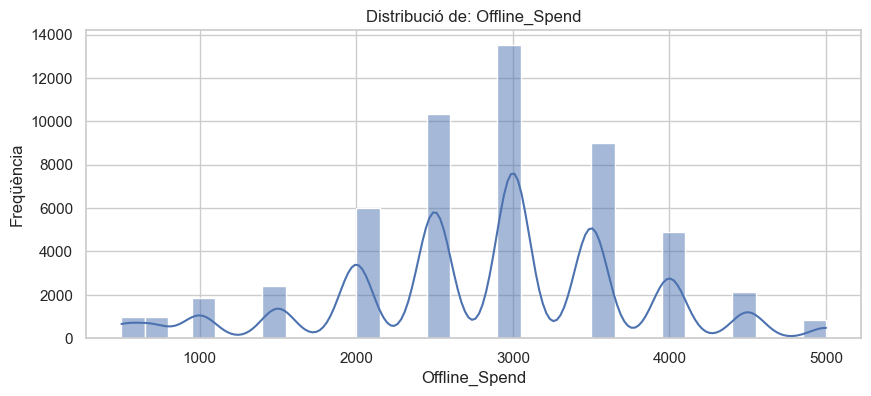

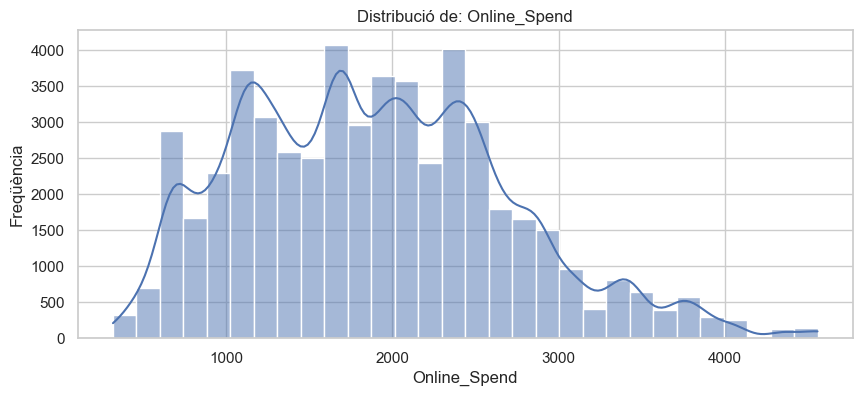

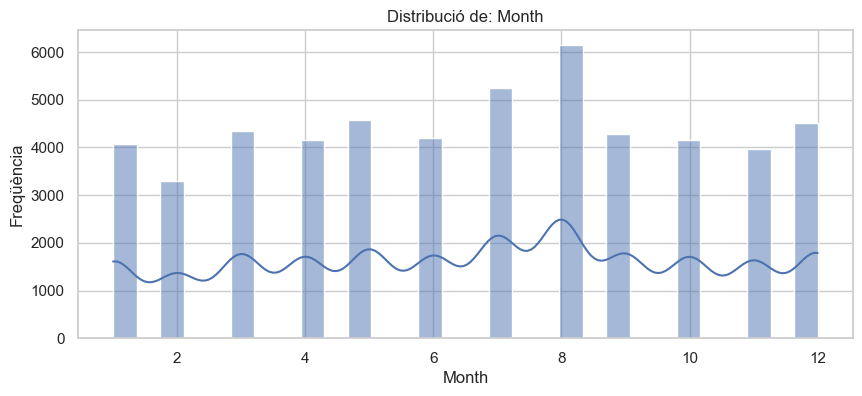

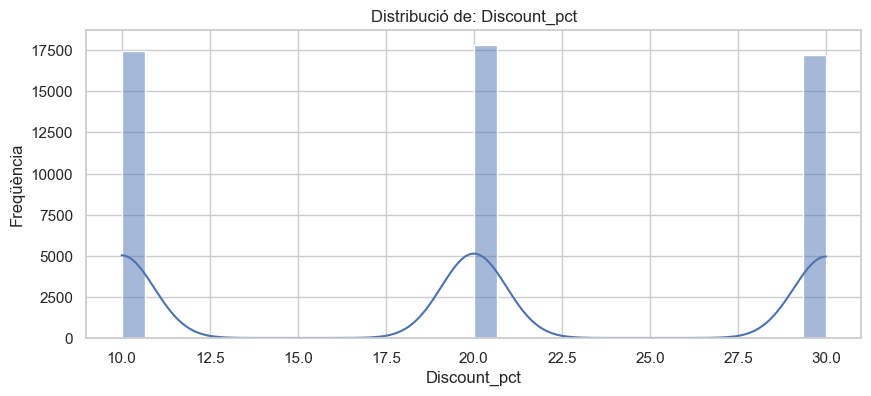

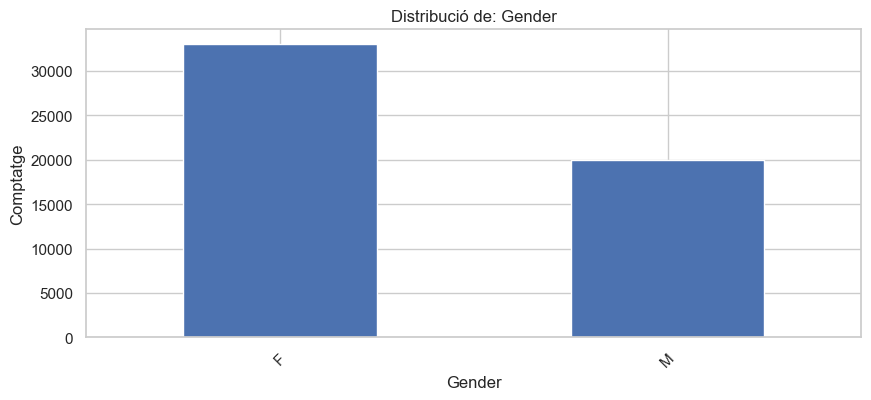

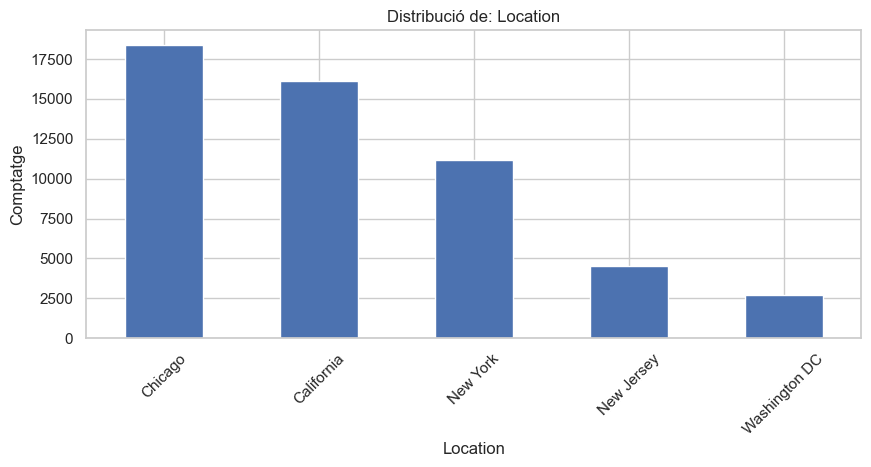

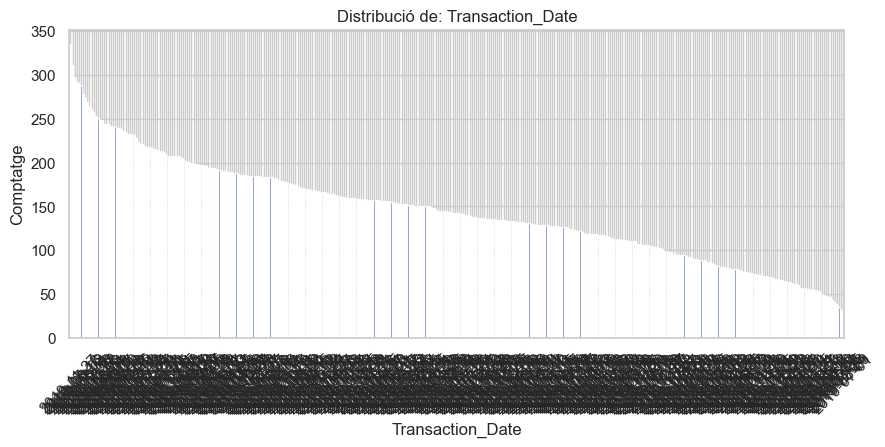

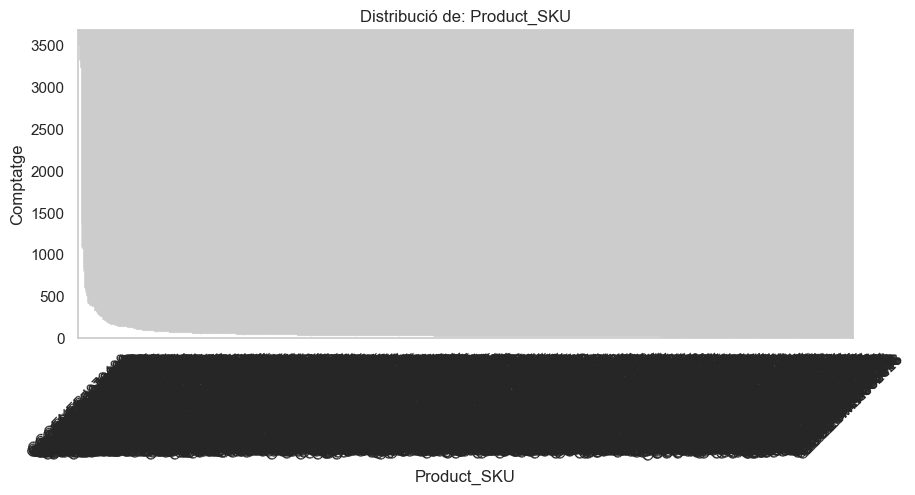

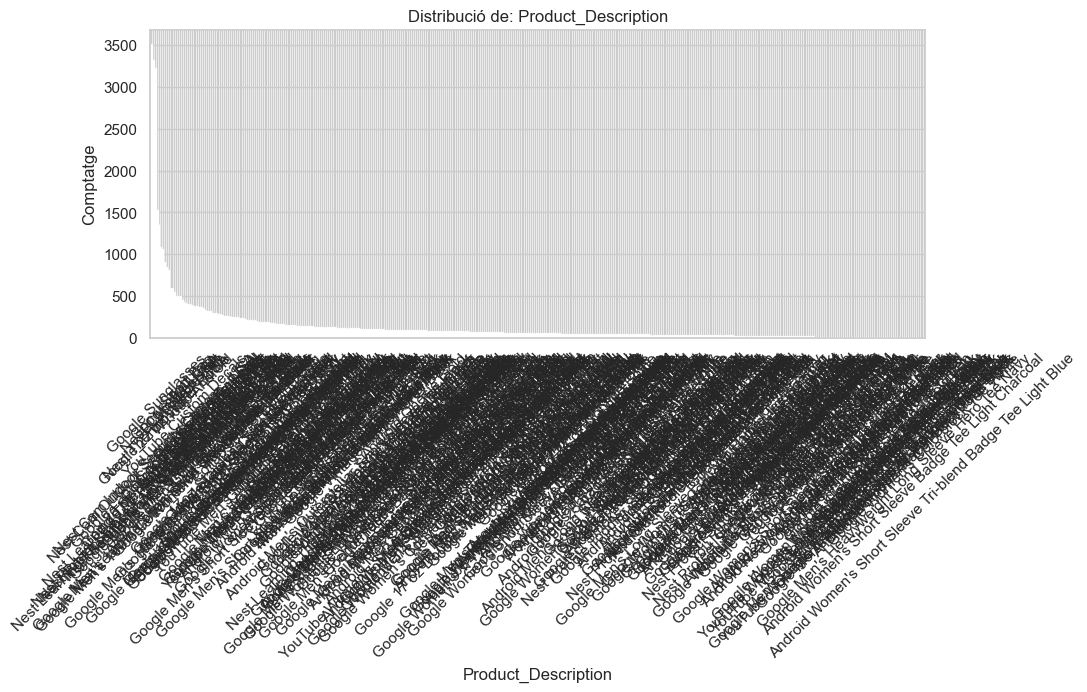

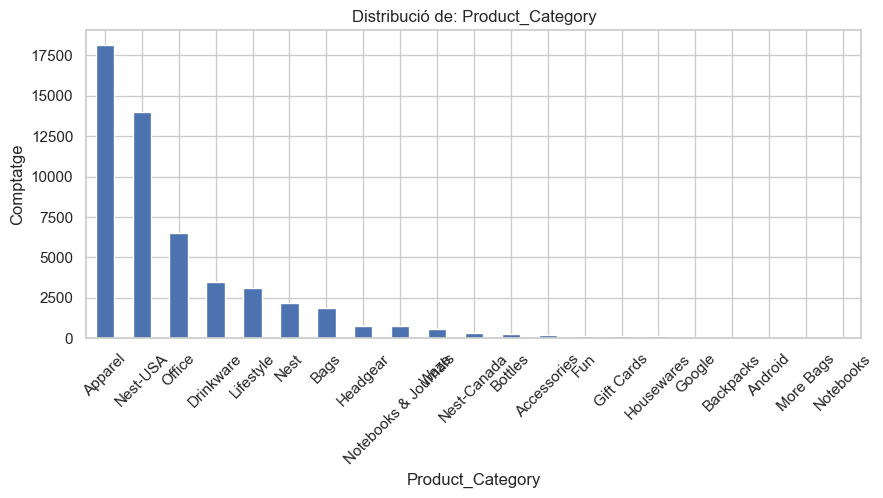

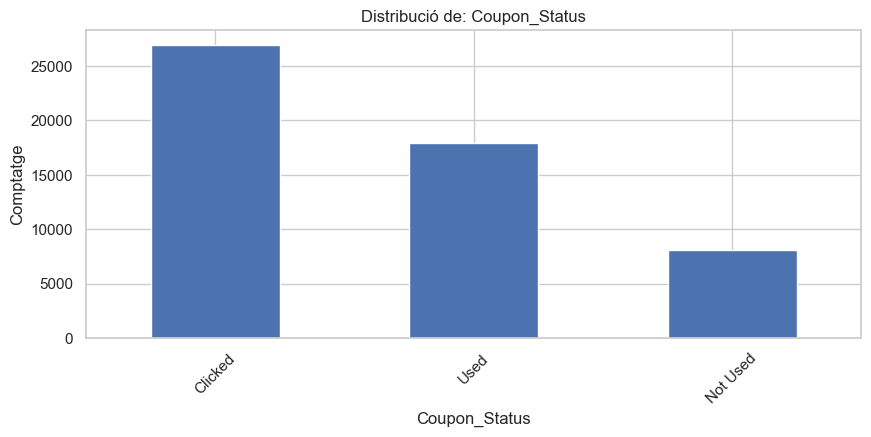

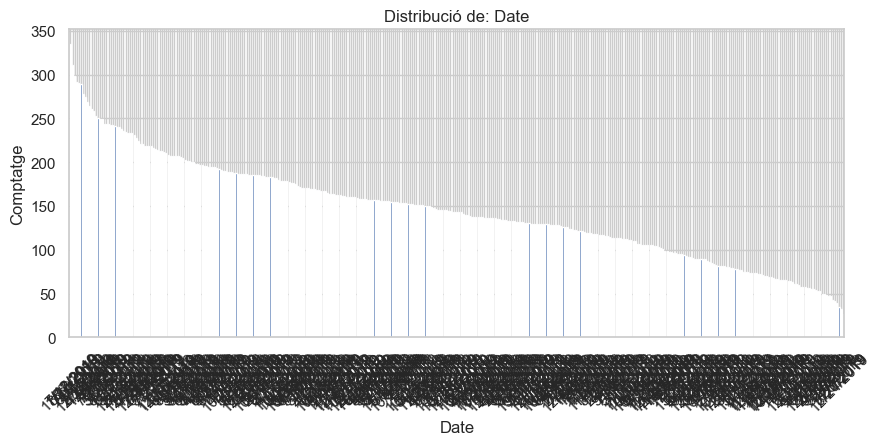

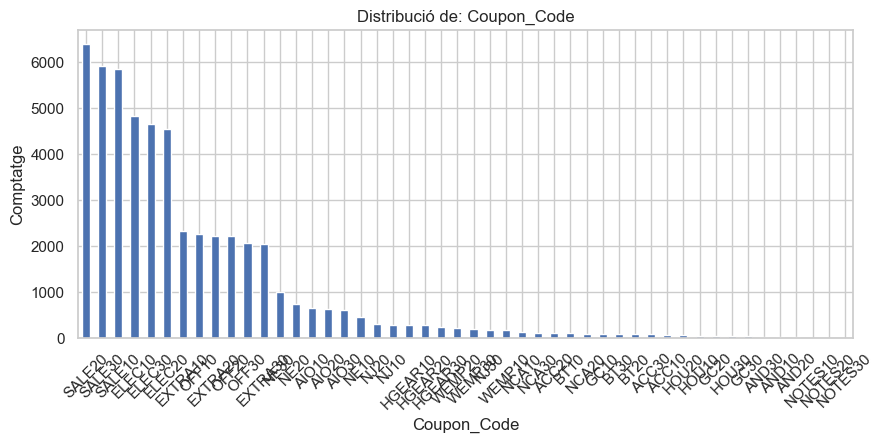

In [12]:
#Visualització gràfica de les diferents dades

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Columnes numèriques: histogrames
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribució de: {col}")
    plt.xlabel(col)
    plt.ylabel("Freqüència")
    plt.show()

# Columnes categòriques: barres
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribució de: {col}")
    plt.xlabel(col)
    plt.ylabel("Comptatge")
    plt.xticks(rotation=45)
    plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Copiem el DataFrame per mantenir l'original intacte
df_encoded = df_clean.copy()

# Codificació binària per a variables amb dues categories
label_vars = ['Gender', 'Coupon_Status']
label_encoder = LabelEncoder()

for col in label_vars:
    df_encoded[col + '_Encoded'] = label_encoder.fit_transform(df_encoded[col])

# One-hot encoding per a 'Location' i 'Product_Category'
df_encoded = pd.get_dummies(df_encoded, columns=['Location', 'Product_Category'], 
                            prefix=['Loc', 'Cat'], drop_first=False)



In [14]:
# Guardem el DataFrame net i preparat a un fitxer CSV

df_encoded.to_csv("data/df_preparat.csv", index=False)

